In [1]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
    dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g


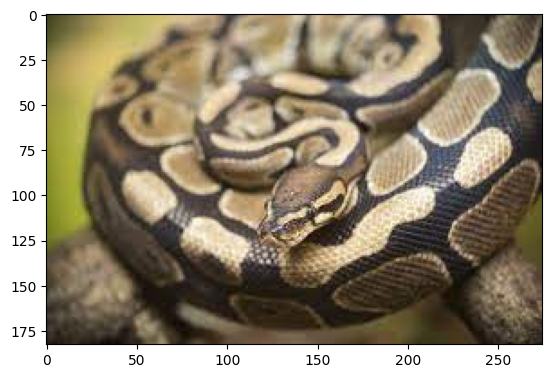

In [2]:
rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# GPU 1D

In [3]:
# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
blockSize = 1024
gridSize = int(pixel_count / blockSize)

In [4]:
rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
rgb_flat_1.shape

(50325, 3)

In [5]:
blocks = [2,4,8,16,32,64,128,256,512]
times = []

In [6]:
for b in blocks:
  start_time_gpu = time.time()
  devSrc = cuda.to_device(rgb_flat_1)
  devDst = cuda.device_array((pixel_count, 3), np.uint8)
  grayscale[gridSize, b](devSrc, devDst)
  hostDst = devDst.copy_to_host()
  gpu_time = time.time() - start_time_gpu
  times.append(gpu_time)

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [7]:
devSrc = cuda.to_device(rgb_flat_1)
devDst = cuda.device_array((pixel_count, 3), np.uint8)
grayscale[gridSize, blockSize](devSrc, devDst)
hostDst = devDst.copy_to_host()
gpu_time = time.time() - start_time_gpu

In [8]:
new_image = hostDst.reshape(imageWidth, imageHeight, 3)

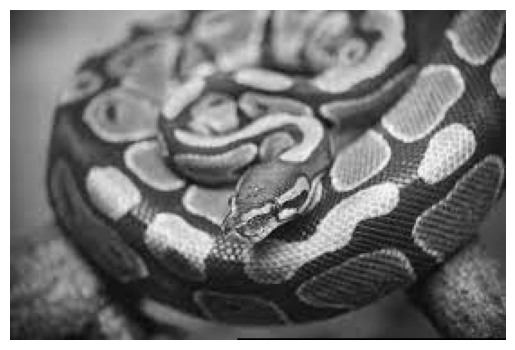

In [9]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [10]:
times

[0.6284818649291992,
 0.0027801990509033203,
 0.0011408329010009766,
 0.0009391307830810547,
 0.0011050701141357422,
 0.000982046127319336,
 0.0021407604217529297,
 0.0010142326354980469,
 0.0009033679962158203]

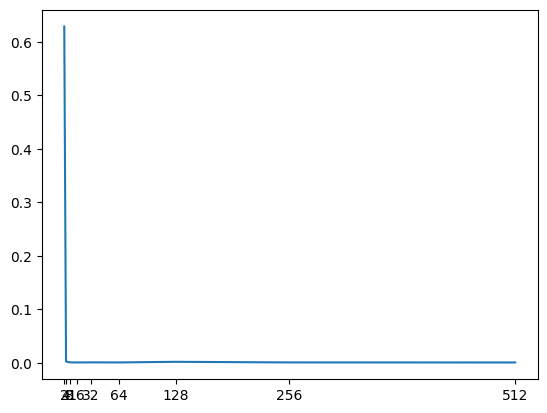

In [11]:
plt.plot(blocks, times)
plt.xticks(blocks)
plt.show()

# GPU 2D

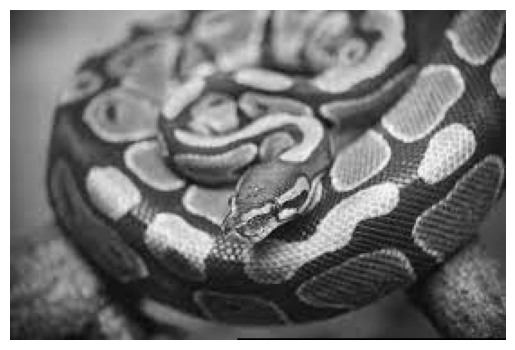

In [12]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
    dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g

rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
blockSize = 1024
gridSize = int(pixel_count / blockSize)

rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
rgb_flat_1.shape

devSrc = cuda.to_device(rgb_flat_1)
devDst = cuda.device_array((pixel_count, 3), np.uint8)
grayscale[gridSize, blockSize](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()

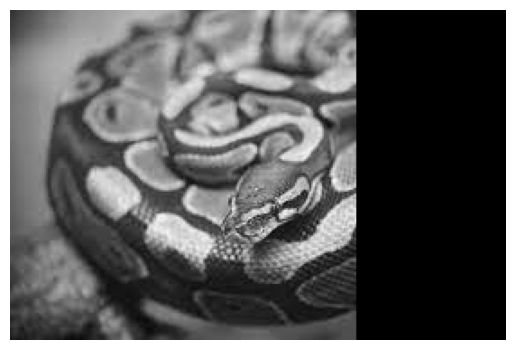

In [13]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # Get the 2D coordinates of the thread in the grid
    row, col = cuda.grid(2)

    if row < src.shape[0] and col < src.shape[1]:
        g = np.uint8((src[row, col, 0] + src[row, col, 1] + src[row, col, 2]) / 3)
        dst[row, col, 0] = dst[row, col, 1] = dst[row, col, 2] = g

rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

# Get the image dimensions
imageWidth, imageHeight, _ = rgb_image.shape

# Create a grid and block configuration
blockDim = (16, 16)  # 16x16 threads per block
gridDim = (imageHeight // blockDim[0] + 1, imageWidth // blockDim[1] + 1)

# Flatten the image into a 1D array of RGB
pixel_count = imageWidth * imageHeight
rgb_flat = rgb_image.reshape(imageWidth, imageHeight, 3)

devSrc = cuda.to_device(rgb_flat)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# Launch the kernel with the 2D grid and block configuration
grayscale[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 54 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


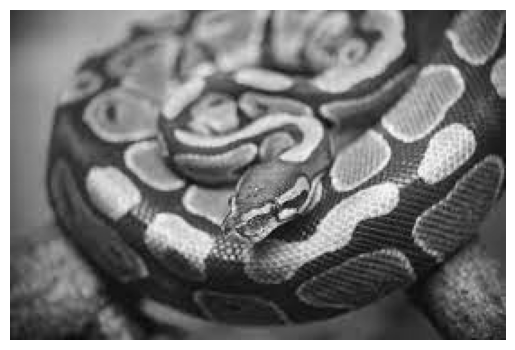

In [14]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

    g = np.uint8((src[tidx, tidy, 0] + src[tidx, tidy, 1] + src[tidx, tidy, 2]) / 3)
    dst[tidx, tidy, 0] = dst[tidx, tidy, 1] = dst[tidx, tidy, 2] = g

# @cuda.jit
# def grayscale(src, dst):
#     # where are we in the input?
#     tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
#     tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

#     g = np.uint8((src[tidy, tidx, 0] + src[tidy, tidx, 1] + src[tidy, tidx, 2]) / 3)
#     dst[tidy, tidx, 0] = dst[tidy, tidx, 1] = dst[tidy, tidx, 2] = g

# rgb_image = imread('python.jpg')
# plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight  = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
# blockSize = 1024
# gridSize = int(pixel_count / blockSize)

gridSize = (8, 8)
blockSize = (32, 32)

blockDim = (32, 32)
gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

# rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
# rgb_flat_1.shape

devSrc = cuda.to_device(rgb_image)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)
# grayscale[gridSize, blockSize](devSrc, devDst)
grayscale[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()

# why does 32 gave weird image
# 64 give not fully grayscale
# this must be a rectangular

In [15]:
blockDim

(32, 32)

In [16]:
gridDim

(6, 9)

In [17]:
(imageWidth, imageHeight)

(183, 275)

In [18]:
blockS = [(2,2), (4,4), (8,8), (16,16), (32, 32)]
timeS = []

In [19]:
for b in blockS:

  start_time_gpu = time.time()
  blockDim = b
  gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

  # rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
  # rgb_flat_1.shape

  devSrc = cuda.to_device(rgb_image)
  devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)
  # grayscale[gridSize, blockSize](devSrc, devDst)
  grayscale[gridDim, blockDim](devSrc, devDst)
  hostDst = devDst.copy_to_host()

  new_image = hostDst.reshape(imageWidth, imageHeight, 3)
  gpu_time = time.time() - start_time_gpu
  timeS.append(gpu_time)

In [20]:
timeS

[0.0025200843811035156,
 0.0012898445129394531,
 0.0009274482727050781,
 0.0006916522979736328,
 0.0009086132049560547]

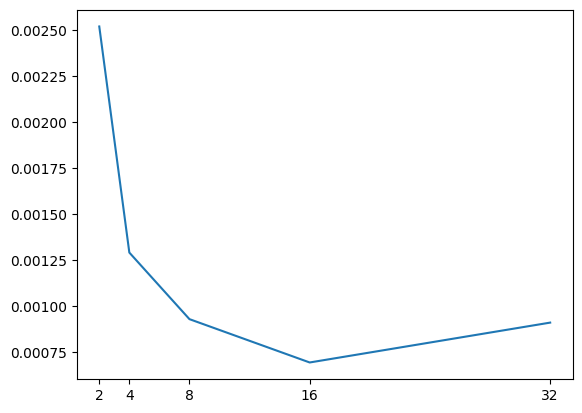

In [21]:
blockS1 = [2, 4, 8, 16, 32]
plt.plot(blockS1, timeS)
plt.xticks(blockS1)
plt.show()

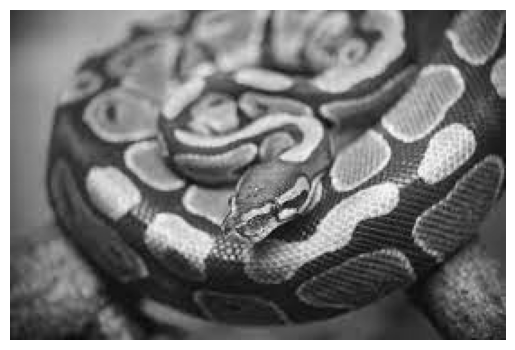

In [22]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

# Shared memory

In [23]:
filter = np.array([
    [0, 0, 1, 2, 1, 0, 0],
    [0, 3, 13, 22, 13, 3, 0],
    [1, 13, 59, 97, 59, 13, 1],
    [2, 22, 97, 159, 97, 22, 2],
    [1, 13, 59, 97, 59, 13, 1],
    [0, 3, 13, 22, 13, 3, 0],
    [0, 0, 1, 2, 1, 0, 0]
])

In [24]:
# import numpy as np

# matrix =
# [[0, 0, 1, 2, 1, 0, 0],
#   [0, 3, 13, 22, 13, 3, 0],
#   [1, 13, 59, 97, 59, 13, 1],
#   [2, 22, 97, 159, 97, 22, 2],
#   [1, 13, 59, 97, 59, 13, 1],
#   [0, 3, 13, 22, 13, 3, 0],
#   [0, 0, 1, 2, 1, 0, 0]]


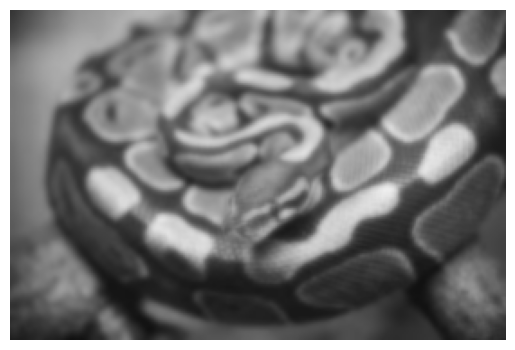

In [25]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define a Numba CUDA kernel for grayscale with Gaussian blur filter
@cuda.jit
def grayscale_with_blur(src, dst):
    tidx, tidy = cuda.grid(2)

    if tidx < src.shape[0] and tidy < src.shape[1]:
        total_weight = 0.0
        weighted_sum = 0.0
        for i in range(-3, 4):
            for j in range(-3, 4):
                if (tidx + i) >= 0 and (tidx + i) < src.shape[0] and (tidy + j) >= 0 and (tidy + j) < src.shape[1]:
                    pixel_value = (src[tidx + i, tidy + j, 0] + src[tidx + i, tidy + j, 1] + src[tidx + i, tidy + j, 2]) / 3
                    weight = gaussian_filter[i + 3][j + 3]
                    weighted_sum += pixel_value * weight
                    total_weight += weight
        dst[tidx, tidy, 0] = dst[tidx, tidy, 1] = dst[tidx, tidy, 2] = np.uint8(weighted_sum / total_weight)

# Define a 7x7 Gaussian filter
gaussian_filter = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 2, 2, 4, 2, 2, 1],
    [2, 2, 4, 8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4, 8, 4, 2, 2],
    [1, 2, 2, 4, 2, 2, 1],
    [1, 1, 2, 2, 2, 1, 1]
])

rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

imageWidth, imageHeight  = rgb_image.shape[0], rgb_image.shape[1]

blockDim = (16, 16)
gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

devSrc = cuda.to_device(rgb_image)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# Launch the kernel with the 2D grid and block configuration
grayscale_with_blur[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()


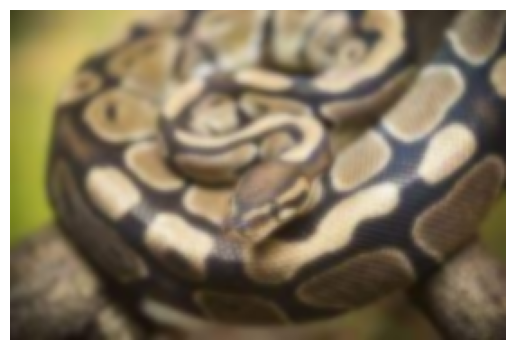

In [26]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread

@cuda.jit
def gaussian_blur(src, dst):
    tidx, tidy = cuda.grid(2)

    if tidx < src.shape[0] and tidy < src.shape[1]: # because this will run though each pixel so don't need to restart
    # tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    # tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
        total_weight = 0.0
        weighted_sum_r = 0.0
        weighted_sum_g = 0.0
        weighted_sum_b = 0.0
        for i in range(-3, 4):
            for j in range(-3, 4):
                if (tidx + i) >= 0 and (tidx + i) < src.shape[0] and (tidy + j) >= 0 and (tidy + j) < src.shape[1]:
                    pixel_r = src[tidx + i, tidy + j, 0]
                    pixel_g = src[tidx + i, tidy + j, 1]
                    pixel_b = src[tidx + i, tidy + j, 2]
                    weight = gaussian_filter[i + 3][j + 3]
                    weighted_sum_r += pixel_r * weight
                    weighted_sum_g += pixel_g * weight
                    weighted_sum_b += pixel_b * weight
                    total_weight += weight
        dst[tidx, tidy, 0] = np.uint8(weighted_sum_r / total_weight)
        dst[tidx, tidy, 1] = np.uint8(weighted_sum_g / total_weight)
        dst[tidx, tidy, 2] = np.uint8(weighted_sum_b / total_weight)

# Define a 7x7 Gaussian filter
gaussian_filter = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 2, 2, 4, 2, 2, 1],
    [2, 2, 4, 8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4, 8, 4, 2, 2],
    [1, 2, 2, 4, 2, 2, 1],
    [1, 1, 2, 2, 2, 1, 1]
])

# Load an RGB image
rgb_image = imread('python.jpg')

# Get the image dimensions
imageWidth, imageHeight  = rgb_image.shape[0], rgb_image.shape[1]

# Create a grid and block configuration
blockDim = (16, 16)
gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

devSrc = cuda.to_device(rgb_image)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# Launch the kernel with the 2D grid and block configuration
gaussian_blur[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()


In [42]:
block_not_shared = [(2,2), (4,4), (8,8), (16,16), (32, 32)]
time_not_shared = []

for b in block_not_shared:

  start_time_gpu = time.time()
  blockDim = b
  gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

  devSrc = cuda.to_device(rgb_image)
  devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

  # Launch the kernel with the 2D grid and block configuration
  gaussian_blur[gridDim, blockDim](devSrc, devDst)
  hostDst = devDst.copy_to_host()

  new_image = hostDst.reshape(imageWidth, imageHeight, 3)
  gpu_time = time.time() - start_time_gpu
  time_not_shared.append(gpu_time)

block_not_shared1 = [2, 4, 8, 16, 32]

In [45]:
time_not_shared

[0.008905410766601562,
 0.0019030570983886719,
 0.0017082691192626953,
 0.0013670921325683594,
 0.0015041828155517578]

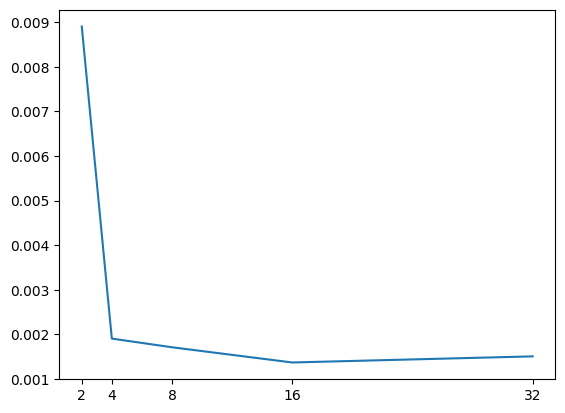

In [43]:
plt.plot(block_not_shared1, time_not_shared)
plt.xticks(block_not_shared1)
plt.show()

# Shared memory

In [28]:
# tile = cuda.shared.array((cuda.blockDim.x, cuda.blockDim.y),numba.uint8)
# tidx = ...
# tidy = ...
# tile[cuda.threadIdx.x, cuda.threadIdx.y] = src[tidx, tidy, 0]

In [29]:
# import numpy as np
# import numba
# from numba import cuda
# import matplotlib.pyplot as plt
# from matplotlib.image import imread

# # Define a Numba CUDA kernel for Gaussian blur with shared memory
# @cuda.jit
# def gaussian_blur_shared(src, dst, filter):
#     tidx, tidy = cuda.grid(2)

#     if tidx < src.shape[0] and tidy < src.shape[1]:
#         total_weight = 0.0
#         weighted_sum_r = 0.0
#         weighted_sum_g = 0.0
#         weighted_sum_b = 0.0
#         for i in range(-3, 4):
#             for j in range(-3, 4):
#                 if (tidx + i) >= 0 and (tidx + i) < src.shape[0] and (tidy + j) >= 0 and (tidy + j) < src.shape[1]:
#                     pixel_r = src[tidx + i, tidy + j, 0]
#                     pixel_g = src[tidx + i, tidy + j, 1]
#                     pixel_b = src[tidx + i, tidy + j, 2]
#                     weight = filter[i + 3, j + 3]
#                     weighted_sum_r += pixel_r * weight
#                     weighted_sum_g += pixel_g * weight
#                     weighted_sum_b += pixel_b * weight
#                     total_weight += weight
#         dst[tidx, tidy, 0] = np.uint8(weighted_sum_r / total_weight)
#         dst[tidx, tidy, 1] = np.uint8(weighted_sum_g / total_weight)
#         dst[tidx, tidy, 2] = np.uint8(weighted_sum_b / total_weight)

# # Define a 7x7 Gaussian filter
# gaussian_filter = np.array([
#     [1, 1, 2, 2, 2, 1, 1],
#     [1, 2, 2, 4, 2, 2, 1],
#     [2, 2, 4, 8, 4, 2, 2],
#     [2, 4, 8, 16, 8, 4, 2],
#     [2, 2, 4, 8, 4, 2, 2],
#     [1, 2, 2, 4, 2, 2, 1],
#     [1, 1, 2, 2, 2, 1, 1]
# ])

# # Load an RGB image
# rgb_image = imread('python.jpg')

# # Get the image dimensions
# imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]

# # Create a grid and block configuration
# blockDim = (16, 16)
# gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

# devSrc = cuda.to_device(rgb_image)
# devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# # Copy the Gaussian filter to shared memory
# filter_shared = cuda.shared.array((7, 7), np.float32)
# tidx, tidy = cuda.threadIdx.x, cuda.threadIdx.y
# # tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
# # tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
# filter_shared[tidx, tidy] = gaussian_filter[tidx, tidy]
# cuda.syncthreads()

# # Launch the kernel with the 2D grid and block configuration
# gaussian_blur_shared[gridDim, blockDim](devSrc, devDst, filter_shared)
# hostDst = devDst.copy_to_host()

# new_image = hostDst.reshape(imageWidth, imageHeight, 3)

# plt.imshow(new_image)
# plt.axis('off')
# plt.show()


In [1]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define a Numba CUDA kernel for Gaussian blur with shared memory
@cuda.jit
def gaussian_blur_shared(src, dst):
    tidx, tidy = cuda.grid(2)

    if tidx < src.shape[0] and tidy < src.shape[1]:
        total_weight = 0.0
        weighted_sum_r = 0.0
        weighted_sum_g = 0.0
        weighted_sum_b = 0.0

        tile = cuda.shared.array((7, 7), np.float32)  # Define the shared memory for the filter
        tidx_s = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
        tidy_s = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
        tile[cuda.threadIdx.x, cuda.threadIdx.y] = gaussian_filter[tidx_s, tidy_s, 0]

        cuda.syncthreads()  # Synchronize threads to ensure filter is loaded

        for i in range(-3, 4):
            for j in range(-3, 4):
                if (tidx + i) >= 0 and (tidx + i) < src.shape[0] and (tidy + j) >= 0 and (tidy + j) < src.shape[1]:
                    pixel_r = src[tidx + i, tidy + j, 0]
                    pixel_g = src[tidx + i, tidy + j, 1]
                    pixel_b = src[tidx + i, tidy + j, 2]
                    weight = tile[i + 3, j + 3]
                    weighted_sum_r += pixel_r * weight
                    weighted_sum_g += pixel_g * weight
                    weighted_sum_b += pixel_b * weight
                    total_weight += weight
        dst[tidx, tidy, 0] = np.uint8(weighted_sum_r / total_weight)
        dst[tidx, tidy, 1] = np.uint8(weighted_sum_g / total_weight)
        dst[tidx, tidy, 2] = np.uint8(weighted_sum_b / total_weight)

# Define a 7x7 Gaussian filter
gaussian_filter = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 2, 2, 4, 2, 2, 1],
    [2, 2, 4, 8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4, 8, 4, 2, 2],
    [1, 2, 2, 4, 2, 2, 1],
    [1, 1, 2, 2, 2, 1, 1]
])

# Load an RGB image
rgb_image = imread('python.jpg')

# Get the image dimensions
imageWidth, imageHeight  = rgb_image.shape[0], rgb_image.shape[1]

# Create a grid and block configuration
blockDim = (16, 16)
gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

devSrc = cuda.to_device(rgb_image)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# Launch the kernel with the 2D grid and block configuration
gaussian_blur_shared[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()

TypingError: ignored

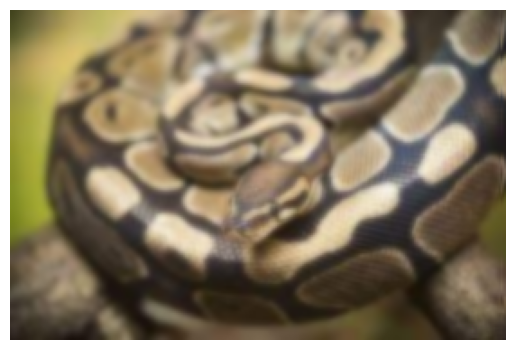

In [1]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define a Numba CUDA kernel for Gaussian blur with shared memory
@cuda.jit
def gaussian_blur_shared(src, dst):
    tidx, tidy = cuda.grid(2)

    if tidx < src.shape[0] and tidy < src.shape[1]:
        total_weight = 0.0
        weighted_sum_r = 0.0
        weighted_sum_g = 0.0
        weighted_sum_b = 0.0
        # filter_shared = cuda.shared.array(shape=(7, 7), dtype=numba.float32)  # Define shared memory for the filter
        # tidx_s = cuda.threadIdx.x
        # tidy_s = cuda.threadIdx.y
        # filter_shared[tidx_s, tidy_s] = filter[tidx_s, tidy_s]
        # cuda.syncthreads()  # Synchronize threads to ensure filter is loaded
        # cuda.shared.array((cuda.blockDim.x, cuda.blockDim.y),numba.uint8)
        tile = cuda.shared.array((7, 7), numba.uint8)  # Define the shared memory for the filter
        # the error was due to np.type here
        # tidx_s = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
        # tidy_s = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
        # tile[cuda.threadIdx.x, cuda.threadIdx.y] = filter[tidx_s, tidy_s]
        tile[cuda.threadIdx.x, cuda.threadIdx.y] = gaussian_filter[cuda.threadIdx.x, cuda.threadIdx.y]

        cuda.syncthreads()  # Synchronize threads to ensure filter is loaded

        for i in range(-3, 4):
            for j in range(-3, 4):
                if (tidx + i) >= 0 and (tidx + i) < src.shape[0] and (tidy + j) >= 0 and (tidy + j) < src.shape[1]:
                    pixel_r = src[tidx + i, tidy + j, 0]
                    pixel_g = src[tidx + i, tidy + j, 1]
                    pixel_b = src[tidx + i, tidy + j, 2]
                    weight = tile[i + 3, j + 3]
                    weighted_sum_r += pixel_r * weight
                    weighted_sum_g += pixel_g * weight
                    weighted_sum_b += pixel_b * weight
                    total_weight += weight
        dst[tidx, tidy, 0] = np.uint8(weighted_sum_r / total_weight)
        dst[tidx, tidy, 1] = np.uint8(weighted_sum_g / total_weight)
        dst[tidx, tidy, 2] = np.uint8(weighted_sum_b / total_weight)

# Define a 7x7 Gaussian filter
gaussian_filter = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 2, 2, 4, 2, 2, 1],
    [2, 2, 4, 8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4, 8, 4, 2, 2],
    [1, 2, 2, 4, 2, 2, 1],
    [1, 1, 2, 2, 2, 1, 1]
], dtype=np.float32)

# Load an RGB image
rgb_image = imread('python.jpg')

# Get the image dimensions
imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]

# Create a grid and block configuration
blockDim = (16, 16)
gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

devSrc = cuda.to_device(rgb_image)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# Launch the kernel with the 2D grid and block configuration
# gaussian_blur_shared[gridDim, blockDim](devSrc, devDst, gaussian_filter)
gaussian_blur_shared[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()


In [7]:
time_shared

[0.006932973861694336,
 0.002340078353881836,
 0.0017325878143310547,
 0.0017278194427490234,
 0.0035636425018310547]

In [5]:
import time
block_shared = [(2,2), (4,4), (8,8), (16,16), (32, 32)]
time_shared = []

for b in block_shared:

  start_time_gpu = time.time()
  blockDim = b
  gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

  devSrc = cuda.to_device(rgb_image)
  devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

  # Launch the kernel with the 2D grid and block configuration
  # gaussian_blur_shared[gridDim, blockDim](devSrc, devDst, gaussian_filter)
  gaussian_blur_shared[gridDim, blockDim](devSrc, devDst)
  hostDst = devDst.copy_to_host()

  new_image = hostDst.reshape(imageWidth, imageHeight, 3)
  gpu_time = time.time() - start_time_gpu
  time_shared.append(gpu_time)

block_shared1 = [2, 4, 8, 16, 32]

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 54 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


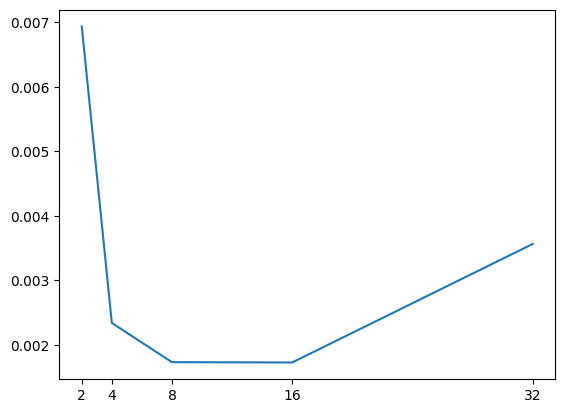

In [6]:
plt.plot(block_shared1, time_shared)
plt.xticks(block_shared1)
plt.show()

In [31]:
import numpy as np
from numba import cuda, int32

@cuda.jit()
def add(output):
    sharedMemT = cuda.shared.array(shape=(1), dtype=int32)
    pos = cuda.grid(1)
    if pos == 0:
        sharedMemT[0] = 0

    cuda.syncthreads()

    cuda.atomic.add(sharedMemT, 0, 1)
    cuda.syncthreads()

    if pos == 0:
        output[0] = sharedMemT[0]

out = np.array([0])
add[1, 2](out)
print(out)

[2]


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


# CPU task

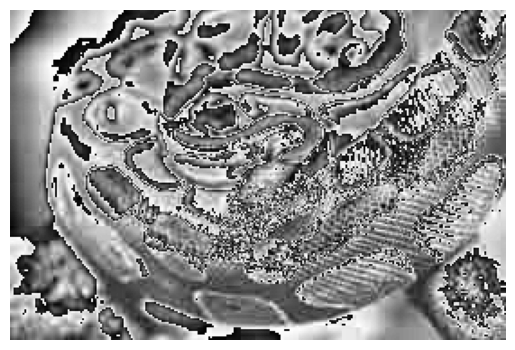

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('python.jpg')
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

start_time = time.time()

# convert image to grayscale
gray_img = (red + green + blue)/3

cpu_time = time.time() - start_time

plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.show()

In [33]:
cpu_time

0.0002682209014892578